# Programmation dynamique

## Somme des nombres dans une pyramide



In [3]:
P=[[3],[7,4],[2,4,6],[9,5,9,3],[4,3,7,5,6],[10,2,8,6,9,0]]
Q=[[7],
   [16,12],
   [9,8,1],
   [18,4,19,20],
   [5,6,13,8,18],
   [11,3,19,7,17,2],
   [5,2,6,11,2,13,20],
   [8,9,13,7,5,2,1,6],
   [16,5,11,8,7,12,14,16,3],
   [6,15,19,3,6,6,10,15,1,18]
  ]

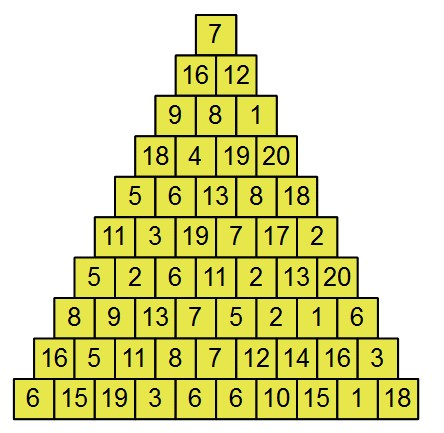

In [4]:
def somme_pyramide(P):
    L=[P[0]]
    for i in range(1,len(P)):
        ligne=[]
        for k in range(len(P[i])):
            if k==0:
                ligne.append(P[i][k]+L[i-1][k])
            elif k==len(P[i])-1:
                ligne.append(P[i][k]+L[i-1][k-1])
            else:
                ligne.append(max(P[i][k]+L[i-1][k-1],P[i][k]+L[i-1][k]))
        L.append(ligne)
    return L

def chemin_pyramide(P):
    L=somme_pyramide(P)
    j=L[-1].index(max(L[-1]))
    chemin=[P[-1][j]]
    for i in range(2,len(L)+1):
        if j==0 or j==len(L[-i]):
            chemin.append(P[-i][j])
        elif L[-i][j-1]>L[-i][j]:
            j=j-1
            chemin.append(P[-i][j])
        else:
            chemin.append(P[-i][j])
    chemin.reverse()
    return chemin

def somme_max_pyramide(P):
    chemin=chemin_pyramide(P)
    return sum(chemin)

In [5]:
print(Q)
L=somme_pyramide(Q)
print(L)
chemin=chemin_pyramide(Q)
print(chemin)
sum(chemin)

[[7], [16, 12], [9, 8, 1], [18, 4, 19, 20], [5, 6, 13, 8, 18], [11, 3, 19, 7, 17, 2], [5, 2, 6, 11, 2, 13, 20], [8, 9, 13, 7, 5, 2, 1, 6], [16, 5, 11, 8, 7, 12, 14, 16, 3], [6, 15, 19, 3, 6, 6, 10, 15, 1, 18]]
[[7], [23, 19], [32, 31, 20], [50, 36, 50, 40], [55, 56, 63, 58, 58], [66, 59, 82, 70, 75, 60], [71, 68, 88, 93, 77, 88, 80], [79, 80, 101, 100, 98, 90, 89, 86], [95, 85, 112, 109, 107, 110, 104, 105, 89], [101, 110, 131, 115, 115, 116, 120, 120, 106, 107]]
[7, 16, 8, 19, 13, 19, 6, 13, 11, 19]


131

In [6]:
from random import randint

def sous_pyramide(P,gauche=True):
    L=[]
    if gauche:
        for i in range(len(P)):
            L.append(P[i][:len(P[i])-1])
    else:
        for i in range(len(P)):
            L.append(P[i][1:])
    return L[1:]

def somme_pyramide_recursif(P):
    if len(P)==1:
        return P[0][0]
    else:
        somme_max=P[0][0]+max(somme_pyramide_recursif(sous_pyramide(P)),
                              somme_pyramide_recursif(sous_pyramide(P,False))
                             )
    return somme_max

def somme_pyramide_recursif_chemin(P,chemin=[],i=0,j=0):
    """
        Déterminer la somme maximale récursivement a été vu avec la fonction récursive précédente.
        Ici, on enregistre le chemin à suivre dans une liste, construite récursivement. 
        Lors de la remontée de la pile d'appels, on doit choisir entre deux trajets Y et Y issus 
        d'une valeur V.
        - Les appels récursifs se font jusqu'au cas de base, soit une pyramide de hauteur n=1, et on stocke les
        indices des valeurs dans la liste chemin
        chemin = [ [x1,x1],[y1,y1]].
        - On remonte la pile d'appels une première fois, soit avec une pyramide de hauteur n=2:
            si gauche est maximal, on supprime [y1,y1] avec pop(-1)
            si droit maximal, on supprime [x1,x1] avec pop(-n)=pop(-2)
            on ajoute la valeur V repérée [x2,x2] (pour l'exemple chemin gauche)
            chemin=[[x1,x1],[x2,x2]]
        - On remonte la pile d'appels qui relance des appels récursifs jusqu'au cas de base:
        chemin=[[x1,x1],[x2,x2],[y1,y1],[z1,z1]]
        - on remonte la pile d'appels avec une pyramide de hauteur n=2
            si gauche est maximal, on supprime [z1,z1] avec pop(-1)
            si droit maximal, on supprime [y1,y1] avec pop(-n)=pop(-2)
            on ajoute la valeur V repérée [y2,y2] (pour l'exemple chemin droit)
            chemin=[[x1,x1],[x2,x2],[y1,y1],[y2,y2]]
        - on remonte la pile d'appels avec la pyramide de hauteur n=3
            si gauche est maximal, on supprime [y1,y1],[y2,y2] avec pop(-1) 2 fois (boucle for)
            si droit maximal, on supprime [x1,x1],[x2,x2] avec pop(-n)=pop(-2) 2 fois (boucle for)
            on ajoute la valeur V repérée [x3,x3] (pour l'exemple chemin gauche)
            chemin=[[x1,x1],[x2,x2],[x3,x3]]
    """
    if len(P)==1:
        chemin.append([i,j])
        return (P[0][0],chemin)
    else:
        i+=1
        n=len(P)
        gauche=sous_pyramide(P,True)
        droit=sous_pyramide(P,False)
        somme_gauche=somme_pyramide_recursif_chemin(gauche,chemin,i,j)[0]
        somme_droit=somme_pyramide_recursif_chemin(droit,chemin,i,j+1)[0]
        if somme_gauche>=somme_droit:
            somme_max=P[0][0]+somme_gauche
            for _ in range(n-1):
                chemin.pop(-1)
            chemin.append([i-1,j])            
        else:
            somme_max=P[0][0]+somme_droit                        
            for _ in range(n-1):
                chemin.pop(-n)
            chemin.append([i-1,j])                
    return (somme_max,chemin)

def affiche_chemin(P):
    s=somme_pyramide_recursif_chemin(P,[])
    print("La somme maximale vaut %s" % s[0])
    chemin=[]
    s[1].reverse()
    print(s[1])
    for couple in s[1]:
        chemin.append(P[couple[0]][couple[1]])
    print("Le chemin à suivre est:")
    for k in range(len(chemin)-1):
        print(chemin[k],end=", ")
    print(chemin[-1])
    
def creer_pyramide(n):
    P=[]
    for k in range(1,n+1):
        ligne=[]
        for i in range(k):
            ligne.append(randint(0,20))
        P.append(ligne)
    return P

def affiche_pyramide(P):
    n=len(P)
    pyramide="\n"
    for k in range(1,n+1):
        pyramide+="  "*(n-k)
        for i in range(k):
            pyramide+="  " + "%2d" % P[k-1][i]
        pyramide+=" "*(n-k)
        pyramide+="\n"
    print(pyramide)

In [7]:
#P=[[3],[7,4],[2,4,6],[9,5,9,3]]
#P=[[3],[7,4],[2,4,6],[9,5,9,3],[10,3,7,5,6],[10,2,8,6,9,0]]
P=creer_pyramide(10)
print(P)
affiche_chemin(P)
affiche_pyramide(P)

[[11], [17, 14], [19, 17, 20], [4, 16, 12, 13], [12, 9, 1, 7, 12], [7, 1, 6, 7, 8, 4], [8, 11, 11, 1, 7, 15, 3], [16, 14, 12, 11, 2, 17, 8, 3], [18, 11, 10, 9, 9, 14, 4, 9, 11], [7, 20, 3, 2, 7, 7, 11, 18, 9, 10]]
La somme maximale vaut 135
[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 4], [6, 5], [7, 5], [8, 5], [9, 6]]
Le chemin à suivre est:
11, 14, 20, 13, 12, 8, 15, 17, 14, 11

                    11         
                  17  14        
                19  17  20       
               4  16  12  13      
            12   9   1   7  12     
           7   1   6   7   8   4    
         8  11  11   1   7  15   3   
      16  14  12  11   2  17   8   3  
    18  11  10   9   9  14   4   9  11 
   7  20   3   2   7   7  11  18   9  10

